# Practice Geopandas
## Author: Priyanshi Singh

In [1]:
#importing packages and setting the work environment
import pandas as pd
import numpy as np
import os
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import getct
import shapely
import matplotlib.pylab as plt
# import seaborn
%matplotlib inline

# Setup the Co-ordinate system and get Brooklyn Census Tract data

In [2]:
# find shapefile and set epsg
shape_path="/home/cusp/ps3369/PUI2016_ps3369/HW10_ps3369/Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.to_crs(epsg=4326, inplace=True)

In [3]:
ct_shape_brooklyn = ct_shape[ct_shape.BoroName == 'Brooklyn']
ct_shape_brooklyn.reset_index(inplace=True)
ct_shape_brooklyn.drop('index', axis=1, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# Create a point for CUSP - 1 MetroTech Brooklyn.

In [4]:
#longitude is east-west (i.e. X) and latitude is north-south (i.e. Y)
cusp = shapely.geometry.Point(-73.9866, 40.6931)

# Find location of CUSP within Brooklyn Census Tract and plot it

In [5]:
for i in xrange(len(ct_shape_brooklyn)):
    if not ct_shape_brooklyn.geometry[i].contains(cusp): continue
    else: break

cusp_index = i        
print 'CUSP is contained in {}'.format(ct_shape_brooklyn.geometry[cusp_index])

CUSP is contained in POLYGON ((-73.98514306089652 40.6948851429698, -73.98516822349798 40.69435907630041, -73.9851960499562 40.69377775320608, -73.98519903380242 40.69371550175662, -73.98523569188235 40.69304536291662, -73.98527941476607 40.69215769710565, -73.98536391830876 40.69066661360505, -73.98633134976359 40.69105051063072, -73.9864643625356 40.69110361177523, -73.98734787420081 40.69145766844002, -73.9882070139312 40.69180696020943, -73.98893356311615 40.69208664198882, -73.98902944698999 40.69212386151998, -73.98910541743069 40.69215331402466, -73.9894723855446 40.69229549434763, -73.99066626290963 40.6924971765605, -73.99097186899587 40.69254880038537, -73.99085041475469 40.6927982506494, -73.99072896048503 40.6930477014476, -73.99058794464069 40.69339137896954, -73.99045286506302 40.69372058427398, -73.99044474094237 40.69382825143359, -73.99066605587349 40.69456882398396, -73.99080803777389 40.6950271337944, -73.99073995964307 40.69503174773607, -73.9900911495747 40.6950757

In [7]:
cusp_ct = GeoDataFrame(ct_shape_brooklyn.iloc[cusp_index,:])

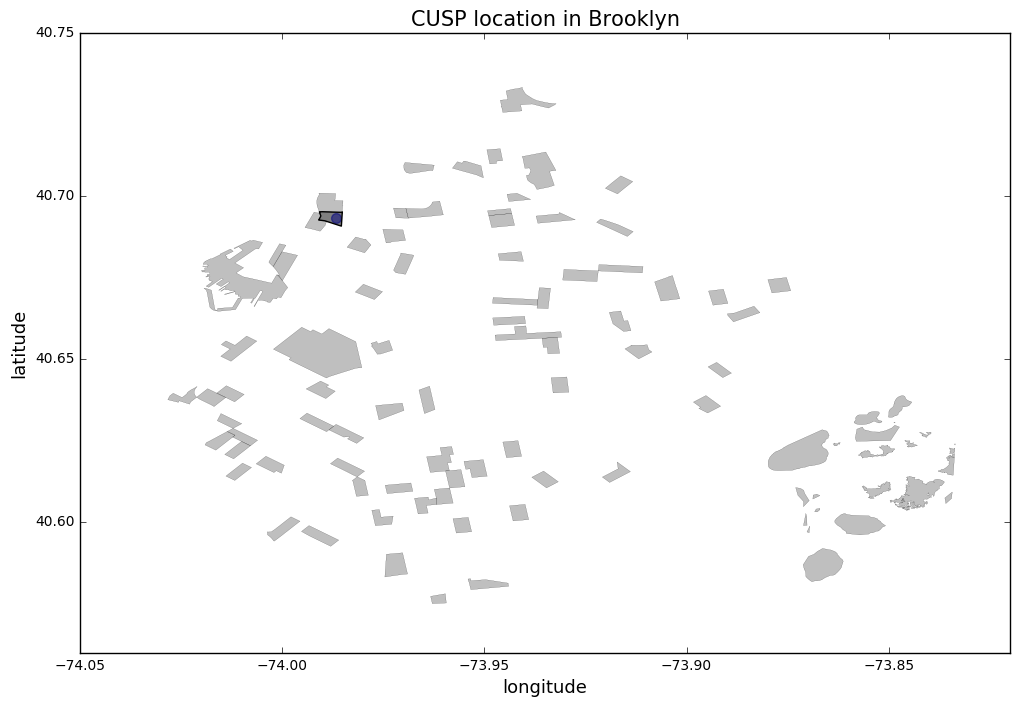

In [8]:
fig, ax = plt.subplots(1, figsize = (12,8))
ct_shape_brooklyn[::10].plot(ax=ax, color = 'grey', linewidth=0.1)
cusp_ct.T.plot(ax=ax, color = 'black')
plt.scatter(cusp.x, cusp.y, color = 'blue', s =50, alpha= 0.5)
plt.xlim(-74.05, -73.82)
plt.ylim(40.56, 40.75)
plt.xlabel('longitude', fontsize = 13)
plt.ylabel('latitude', fontsize = 13)
plt.title('CUSP location in Brooklyn', fontsize = 15)
plt.show()

### Figure1: The above map shows some census tracts of Brooklyn Borough and the blue point shows the position of CUSP(1 Metrotech Center, Brooklyn). The red polygon is the census tract of CUSP. CUSP is located in the north east part of Brooklyn